In [44]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import geopy
# px.colors.named_colorscales()

In [82]:
forest_data = pd.read_csv("/kaggle/input/world-forest-area/forest_area_percent.csv")
coordinates = pd.read_csv("/kaggle/input/geographic-coordinates-of-countries/Book1.csv",encoding="latin-1")

coordinates.drop(["country"],inplace=True,axis=1)
coordinates.columns = ['Lat', 'Lon', 'Country Name']
coordinates.head()

forest_data = forest_data.merge(coordinates,on=["Country Name"],how="inner")

# Scatter Geo Plot

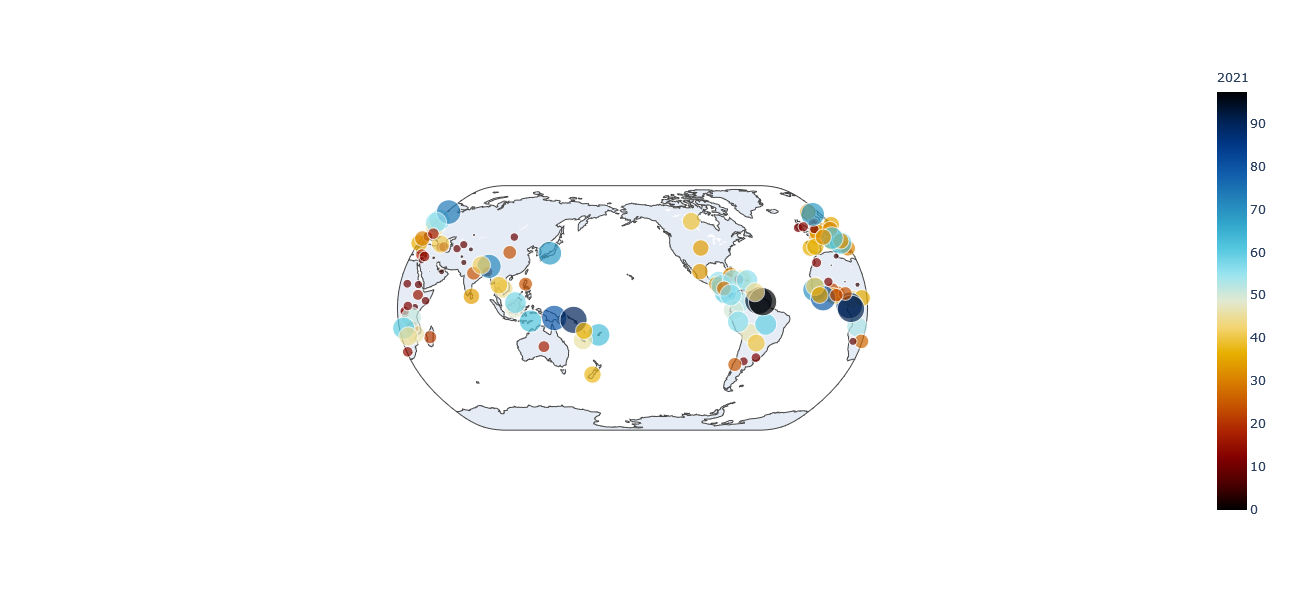

In [81]:
fig = px.scatter_geo(forest_data, locations="Country Code", color="2021",
                     hover_name="Country Name", size="2021",
                     projection="natural earth", height = 600,
                     color_continuous_scale=px.colors.cyclical.IceFire_r)
fig.show()

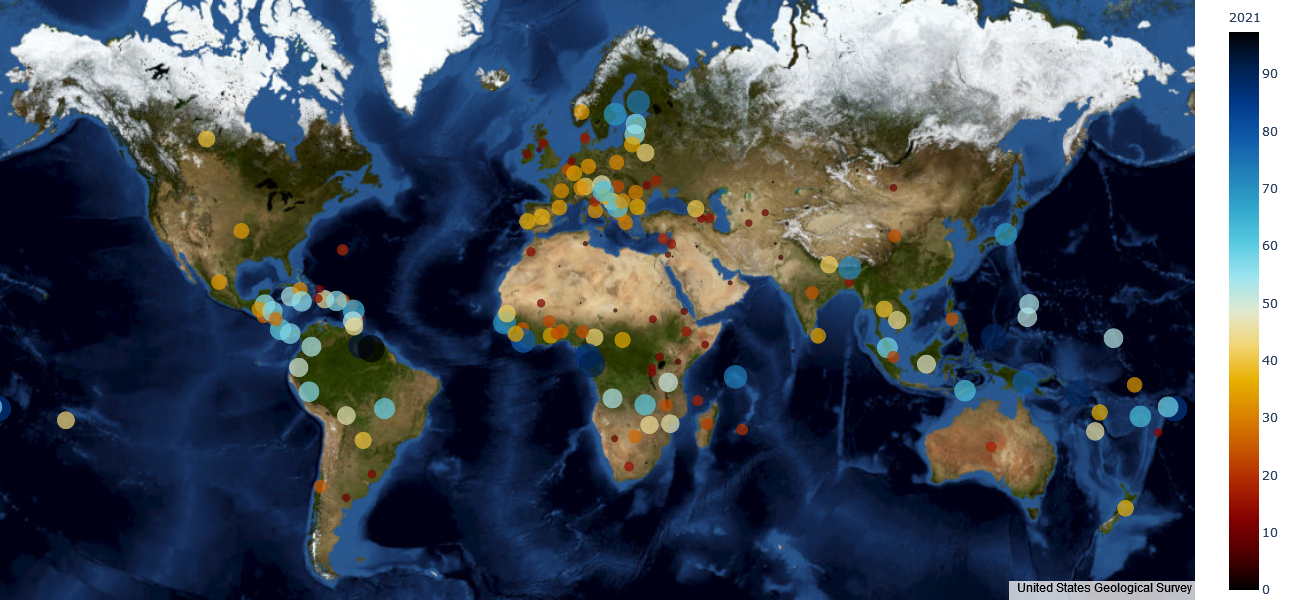

In [97]:
fig = px.scatter_mapbox(forest_data, size = "2021",
                        color="2021", height = 600,
                        color_continuous_scale=px.colors.cyclical.IceFire_r,
                        lat="Lat", lon="Lon",
                        hover_name="Country Code", zoom=1.2)
fig.update_layout(
#     mapbox_style="open-street-map"
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

12.4533865